<a href="https://colab.research.google.com/github/LeandroCoelhos/exemplos_modelos/blob/main/7_MVP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_validate, RepeatedKFold 
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import GridSearchCV

In [ ]:
url1 = 'https://raw.githubusercontent.com/LeandroCoelhos/salario_funcionario/main/data/treino.csv'
url2 = 'https://raw.githubusercontent.com/LeandroCoelhos/salario_funcionario/main/data/teste.csv'

treino = pd.read_csv(url1)
teste = pd.read_csv(url2)

In [ ]:
treino.describe()

,sexo,idade,faixa_etaria,cor_raca,escolaridade,horas_trabalho_por_semana,portador_de_deficiencia,tamanho_da_empresa,tempo_no_emprego,remuneracao,id
count,15000.000000,15000.00000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,1.500000e+04
mean,1.418467,38.47240,5.268467,37.277533,7.066533,39.171600,0.007867,7.102800,83.200600,3048.329903,1.230351e+06
std,0.493324,11.59629,1.268003,43.163674,1.619593,7.780124,0.088348,2.709721,100.756705,3783.080296,7.081270e+05
min,1.000000,14.00000,1.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,301.430000,2.200000e+01
25%,1.000000,29.00000,4.000000,8.000000,7.000000,37.000000,0.000000,5.000000,12.700000,1274.707500,6.237862e+05
50%,1.000000,37.00000,5.000000,8.000000,7.000000,44.000000,0.000000,8.000000,40.700000,1764.360000,1.238586e+06
75%,2.000000,46.00000,6.000000,99.000000,8.000000,44.000000,0.000000,10.000000,118.900000,3213.360000,1.841327e+06
max,2.000000,84.00000,8.000000,99.000000,11.000000,44.000000,1.000000,10.000000,596.500000,63218.070000,2.459844e+06


<AxesSubplot:>

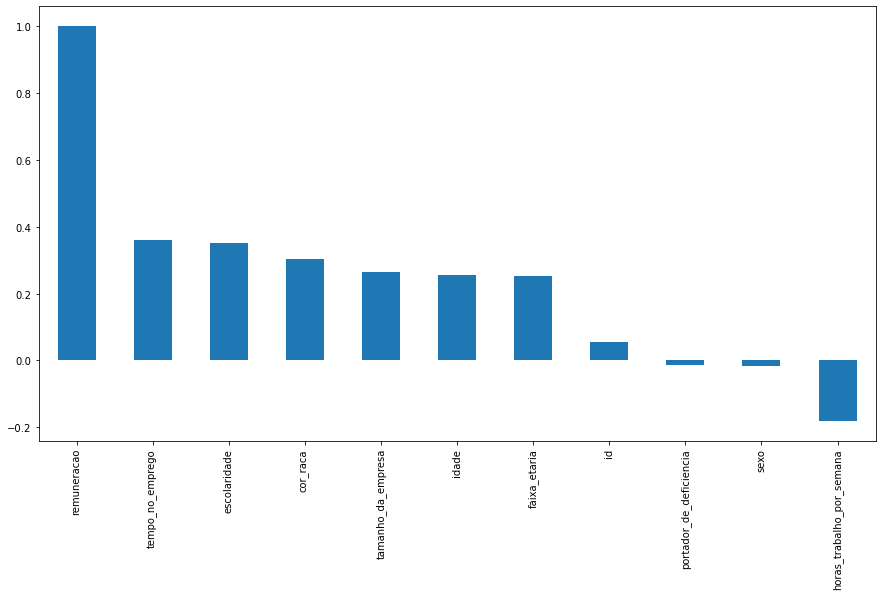

In [ ]:
plt.figure(figsize=(15,8))
treino.corr()['remuneracao'].sort_values(ascending = False).plot(kind='bar')

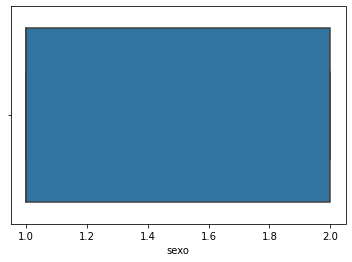

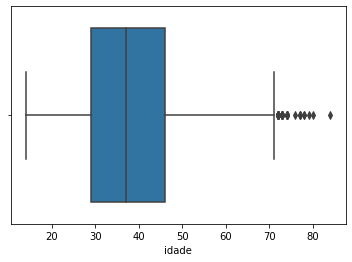

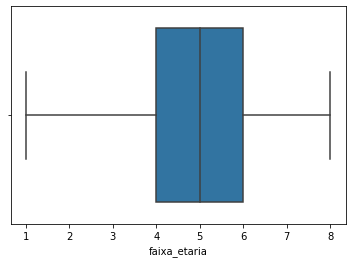

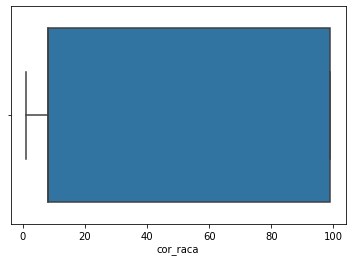

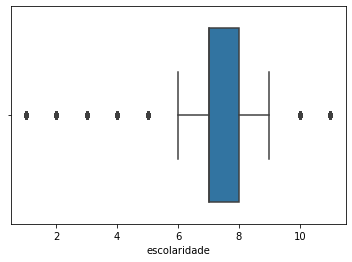

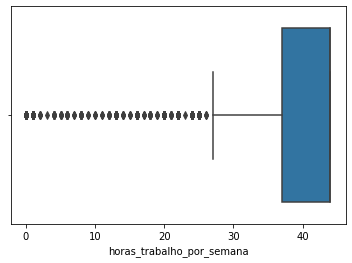

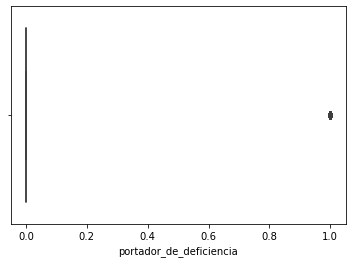

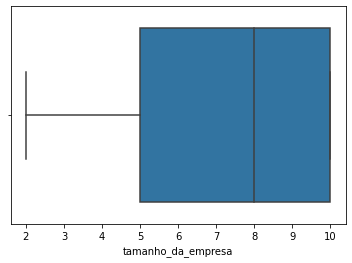

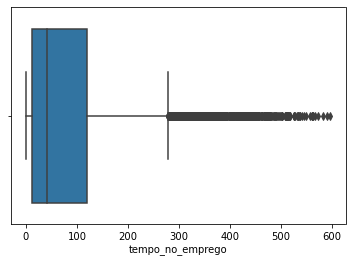

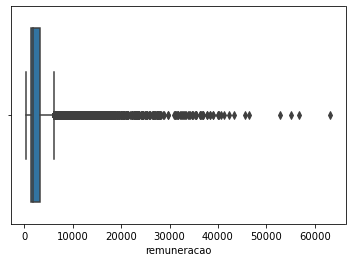

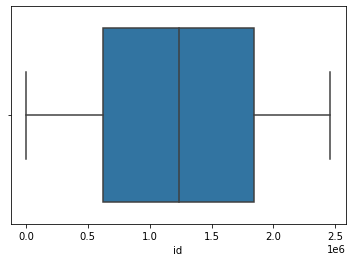

In [ ]:
for i in treino.corr().columns:
    sns.boxplot(x = treino[i])
    plt.show()

In [ ]:
treino = treino.drop(['faixa_etaria','id'], axis=1) 
teste = teste.drop(['faixa_etaria', 'id'], axis=1) 

In [ ]:
treino = treino[(treino.remuneracao < 6000) & (treino.tempo_no_emprego <= 280)]
treino.shape

(12856, 9)

In [ ]:
treino['sexo'] = treino['sexo'].map({2: 0, 1:1})
teste['sexo'] = teste['sexo'].map({2: 0, 1:1})

treino['cor_raca'] = treino['cor_raca'].map({99: 1, 1:0, 2:0, 4:0, 6:0, 8:0, 9:0})#ok
teste['cor_raca'] = teste['cor_raca'].map({99: 1, 1:0, 2:0, 4:0, 6:0, 8:0, 9:0})#ok

treino['tamanho_da_empresa'] = treino['tamanho_da_empresa'].map({2:0, 3:0, 4:3, 5:3, 6:3, 7:5, 8:5, 9:5, 10:10})#ok
teste['tamanho_da_empresa'] = teste['tamanho_da_empresa'].map({2:0, 3:0, 4:3, 5:3, 6:3, 7:5, 8:5, 9:5, 10:10})#ok


treino['escolaridade'] = treino['escolaridade'].map({1:0, 2:0 ,3:0, 4:0, 5:0, 6:0, 7:7, 8:8, 9:10, 10:10 , 11:9})
teste['escolaridade'] = teste['escolaridade'].map({1:0, 2:0 ,3:0, 4:0, 5:0, 6:0, 7:7, 8:8, 9:10, 10:10 , 11:9})


In [ ]:
def remunera(x):
  if (x > 6000):
    return 6000
  else:
    return x

def emprego(x):
  if (x > 300):
    return 300
  else:
    return x

def empre(x):
  if (x < 12):
    return 0
  elif (x >= 12) and (x < 24):
    return 1
  elif (x >= 24) and (x < 36):
    return 2
  elif (x >= 36) and (x < 48):
    return 3
  elif (x >= 48) and (x < 60):
    return 4
  elif (x >= 60) and (x < 120):
    return 5
  elif (x >= 120) and (x < 300):
    return 6
  else:
    return 7

#treino['remuneracao'] = treino['remuneracao'].apply(remunera)
#treino['tempo_no_emprego'] = treino['tempo_no_emprego'].apply(emprego)

In [ ]:
treino['idade'] = treino['idade']/84
teste['idade'] = teste['idade']/84

treino['horas_trabalho_por_semana'] = treino['horas_trabalho_por_semana']/44
teste['horas_trabalho_por_semana'] = teste['horas_trabalho_por_semana']/44

treino['tempo_no_emprego'] = treino['tempo_no_emprego']/600
teste['tempo_no_emprego'] = teste['tempo_no_emprego']/600

treino['tamanho_da_empresa'] = treino['tamanho_da_empresa']/10#ok
teste['tamanho_da_empresa'] = teste['tamanho_da_empresa']/10

#treino['escolaridade'] = treino['escolaridade']/3
#teste['escolaridade'] = teste['escolaridade']/3

#treino['id'] = treino['id']/2.459844e+06


In [ ]:
# realiza da dummificação das variáveis
treino = pd.get_dummies(treino, columns = ['escolaridade'], dtype=int)
teste = pd.get_dummies(teste, columns = ['escolaridade'], dtype=int)

In [ ]:
treino.head()

,sexo,idade,cor_raca,horas_trabalho_por_semana,portador_de_deficiencia,tamanho_da_empresa,tempo_no_emprego,remuneracao,escolaridade_0,escolaridade_7,escolaridade_8,escolaridade_9,escolaridade_10
0,1,0.369048,0,1.000000,0,1.0,0.006333,2551.21,0,1,0,0,0
1,1,0.690476,0,1.000000,0,0.0,0.003167,3248.53,0,1,0,0,0
2,0,0.690476,1,0.681818,0,0.5,0.426500,1662.69,0,1,0,0,0
3,1,0.345238,0,1.000000,0,0.5,0.000667,918.82,0,1,0,0,0
5,1,0.309524,0,1.000000,0,0.3,0.024000,1900.88,0,1,0,0,0


In [ ]:
#Separando em treino e Teste
xtreino = treino.drop(['remuneracao'], axis=1)#
ytreino = treino['remuneracao'].to_list()
print(xtreino.shape)

(12856, 12)


In [ ]:
'''from sklearn.model_selection import train_test_split
medi = 0
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(xtreino, ytreino, test_size=0.25)
    modelo = GradientBoostingRegressor()
    modelo.fit(X_train, y_train)

    pred = modelo.predict(X_test)
    mae = metrics.mean_absolute_error(y_test, pred)
    print(mae)
    med += mae
print(med/10)'''

'from sklearn.model_selection import train_test_split\nmedi = 0\nfor i in range(10):\n    X_train, X_test, y_train, y_test = train_test_split(xtreino, ytreino, test_size=0.25)\n    modelo = GradientBoostingRegressor()\n    modelo.fit(X_train, y_train)\n\n    pred = modelo.predict(X_test)\n    mae = metrics.mean_absolute_error(y_test, pred)\n    print(mae)\n    med += mae\nprint(med/10)'

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.metrics import mean_squared_error

from sklearn.ensemble import VotingRegressor

In [ ]:
#Nomes dos classificadores considerados
nome = [
    'Regressão',
    '5-Vizinhos Mais Próximos',
    #'15-Vizinhos Mais Próximos',
    #'Default-Vizinhos Mais Próximos',
    #'Árvore de Decisão',
    #'SVM RBF',
    #'SVM Linear',
    #'SVM Poly',
    'Gradiente Boosting',
    'Floresta Aleatoria',
    #'ExtraTrees',
    #'MLP'
    ]

#Classificadores considerados
regressor = [
    LinearRegression(),         
    KNeighborsRegressor(n_neighbors = 25),
    #KNeighborsRegressor(n_neighbors = 15),
    #KNeighborsRegressor(),
    #DecisionTreeRegressor(),
    #SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1),
    #SVR(kernel="linear", C=100, gamma="auto"),
    #SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1),
    GradientBoostingRegressor(),
    RandomForestRegressor(),
    #ExtraTreesRegressor(),
    #MLPRegressor(),   

    ]

In [ ]:
validacao = RepeatedKFold(n_splits = 10, n_repeats = 10)
resultados = pd.DataFrame() #dataframe vazio para guardar os resultados

i = 1
for i, modelo in enumerate(regressor):
    print('Ajustando o modelo', nome[i])
    mol_testes = cross_validate(modelo, xtreino, ytreino, cv = validacao, 
                                scoring = ['neg_mean_absolute_error','neg_mean_squared_error', 'r2'],
                                verbose = 10, n_jobs = -1)
    #atribui as métricas para o dataframe para comparação
    ema = mol_testes['test_neg_mean_absolute_error'].mean()
    sqd = mol_testes['test_neg_mean_squared_error'].mean()
    r2 = mol_testes['test_r2'].mean()
    #Atribuindo os resultado ao dataframe resultados
    dic = {'EMA': [ema], 'SQUAD': [sqd], 'R2': [r2]}
    aux = pd.DataFrame(dic, index = [nome[i]])
    resultados = pd.concat([resultados, aux])

Ajustando o modelo Regressão


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0313s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1032s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  71 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  88 out of 100 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Ajustando o modelo 5-Vizinhos Mais Próximos


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  88 out of 100 | elapsed:    2.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Ajustando o modelo Gradiente Boosting


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done  88 out of 100 | elapsed:    7.6s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    8.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Ajustando o modelo Floresta Aleatoria


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:   19.0s
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:   22.8s
[Parallel(n_jobs=-1)]: Done  88 out of 100 | elapsed:   26.4s remaining:    3.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   29.0s finished


In [ ]:
resultados = resultados.sort_values('EMA', ascending=False) #organiza o dataframe segundo o F1
resultados.head(50)

,EMA,SQUAD,R2
Gradiente Boosting,-632.438683,-785292.747080,0.399725
5-Vizinhos Mais Próximos,-639.421588,-813103.300172,0.378221
Floresta Aleatoria,-657.675427,-862737.306991,0.340253
Regressão,-670.821546,-859630.685056,0.342590


In [ ]:
resultados = resultados.sort_values('EMA', ascending=False) #organiza o dataframe segundo o F1
resultados.head(40)

,EMA,SQUAD,R2
Gradiente Boosting,-650.131237,-816920.148876,0.413860
5-Vizinhos Mais Próximos,-657.270454,-849310.532266,0.390615
Floresta Aleatoria,-671.260345,-887900.763764,0.362964
Regressão,-689.066599,-893501.930024,0.358848


In [ ]:
resultados = resultados.sort_values('EMA', ascending=False) #organiza o dataframe segundo o F1
resultados.head(40)

,EMA,SQUAD,R2
Gradiente Boosting,-649.838051,-8.167229e+05,0.414110
5-Vizinhos Mais Próximos,-657.366716,-8.493923e+05,0.390310
15-Vizinhos Mais Próximos,-659.633563,-8.579676e+05,0.384331
Floresta Aleatoria,-672.473639,-8.901080e+05,0.361331
Default-Vizinhos Mais Próximos,-688.411699,-9.412279e+05,0.324491
Regressão,-688.990412,-8.933538e+05,0.358920
ExtraTrees,-703.129771,-1.000584e+06,0.281908


In [ ]:
resultados = resultados.sort_values('EMA', ascending=False) #organiza o dataframe segundo o F1
resultados.head(40)

,EMA,SQUAD,R2
Gradiente Boosting,-1430.956640,-8.977587e+06,0.374358
5-Vizinhos Mais Próximos,-1458.500278,-9.419969e+06,0.342866
15-Vizinhos Mais Próximos,-1465.023145,-9.522279e+06,0.336199
Floresta Aleatoria,-1488.529854,-9.732230e+06,0.317418
Default-Vizinhos Mais Próximos,-1538.609322,-1.054968e+07,0.261873
ExtraTrees,-1543.174855,-1.087598e+07,0.237064
Regressão,-1743.452202,-1.052574e+07,0.265772


#Voto

In [ ]:
mol_1 = SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1)
mol_2 = GradientBoostingRegressor()
mol_3 = KNeighborsRegressor(n_neighbors = 25)

voto = VotingRegressor(estimators = [('SVC', mol_1), ('Grad', mol_2), ('Flor', mol_3)])
voto = voto.fit(xtreino, ytreino)

pred_voto = voto.predict(teste)
subm = pd.DataFrame()
subm['remuneracao'] = pred_voto
subm.to_csv('D:\submissão05t0.csv', index = False)

In [ ]:
subm

,remuneracao
0,1781.347470
1,1877.511971
2,3682.419699
3,2513.391062
4,2029.754441
...,...
14995,2390.823659
14996,1614.281626
14997,1534.628608
14998,1199.030234
